In [47]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf

from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plot

from keras.layers import Conv2D,MaxPooling2D,Dropout,Conv2DTranspose,concatenate

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
train_folder = "/content/gdrive/My Drive/cityscapes_data/train"
test_folder = "/content/gdrive/My Drive/cityscapes_data/val"

train_onlyfiles = [f for f in os.listdir(train_folder)]
test_onlyfiles = [f for f in os.listdir(test_folder)]

print("Train images : {}".format(len(train_onlyfiles)))
print("Test images : {}".format(len(test_onlyfiles)))

Train images : 2975
Test images : 500


In [50]:
train_files = []
test_files = []
train_img_arr = []
test_img_arr = []

for _file in train_onlyfiles:
    train_files.append(_file)
for _file in test_onlyfiles:
    test_files.append(_file)
    

for _file in train_files:
    img = load_img(train_folder + "/" + _file) 
    img.thumbnail((256, 512))
    x = img_to_array(img) 
    train_img_arr.append(x)
for _file in test_files:
    img = load_img(test_folder + "/" + _file) 
    img.thumbnail((256, 512))
    x = img_to_array(img) 
    test_img_arr.append(x)

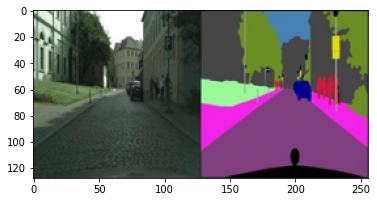

In [51]:
plot.imshow(array_to_img(train_img_arr[0]))

In [52]:
train_arr = np.array(train_img_arr)
test_arr = np.array(test_img_arr)

In [53]:
x_train = train_arr[:,:,0:128,:]
y_train = train_arr[:,:,128:256,:]
x_test = test_arr[:,:,0:128,:]
y_test = test_arr[:,:,128:256,:]

In [54]:
x_train = x_train/255
y_train = y_train/255
x_test = x_test/255
y_test = y_test/255

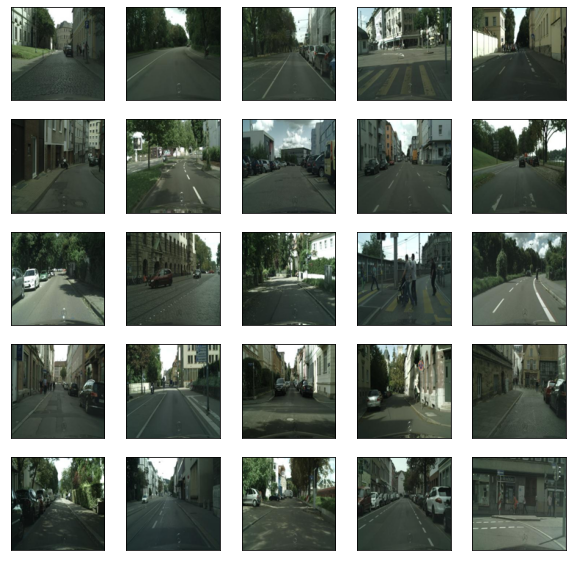

In [55]:
plot.figure(figsize=(10,10))
for i in range(25):
    plot.subplot(5,5,i+1)
    plot.xticks([])
    plot.yticks([])
    plot.grid(False)
    plot.imshow(x_train[i])
plot.show()

In [56]:

def SegmModel():
    inputs = tf.keras.layers.Input((128, 128, 3))
    start_neurons = 16
    dropout_rate = 0.4
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(inputs)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(dropout_rate)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(dropout_rate)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(dropout_rate)(pool3)

    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)

    conv5 = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    conv5 = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(conv5)
    pool5 = MaxPooling2D((2, 2))(conv5)
    pool5 = Dropout(dropout_rate)(pool5)

    convm = Conv2D(start_neurons * 32, (3, 3), activation="relu", padding="same")(pool5)
    convm = Conv2D(start_neurons * 32, (3, 3), activation="relu", padding="same")(convm)

    deconv5 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv5 = concatenate([deconv5, conv5])
    uconv5 = Dropout(dropout_rate)(uconv5)
    uconv5 = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(uconv5)
    uconv5 = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(uconv5)

    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv5)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(dropout_rate)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(dropout_rate)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(dropout_rate)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(dropout_rate)(uconv1)
    
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

    outputs = Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv1)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model


In [58]:
segm_model = SegmModel()
segm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
segm_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 128, 128, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_46[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 64, 64, 16)   0           conv2d_47[0][0]                  
____________________________________________________________________________________________

In [77]:
history = segm_model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
93/93 [==============================] - 610s 7s/step - loss: 0.5871 - accuracy: 0.5310 - val_loss: 0.5849 - val_accuracy: 0.6491
Epoch 2/5
93/93 [==============================] - 611s 7s/step - loss: 0.5844 - accuracy: 0.6189 - val_loss: 0.5786 - val_accuracy: 0.6069
Epoch 3/5
93/93 [==============================] - 608s 7s/step - loss: 0.5806 - accuracy: 0.6284 - val_loss: 0.5738 - val_accuracy: 0.6119
Epoch 4/5
93/93 [==============================] - 616s 7s/step - loss: 0.5773 - accuracy: 0.6310 - val_loss: 0.5714 - val_accuracy: 0.6111
Epoch 5/5
93/93 [==============================] - 610s 7s/step - loss: 0.5749 - accuracy: 0.6434 - val_loss: 0.5687 - val_accuracy: 0.6842


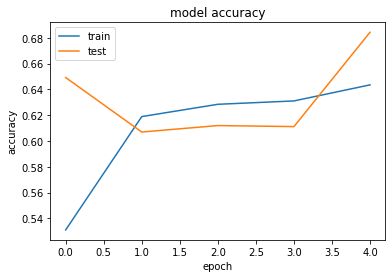

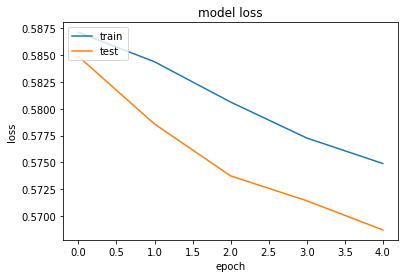

In [78]:
# summarize history for accuracy
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper left')
plot.show()
# summarize history for loss
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper left')
plot.show()

In [79]:
import tensorflow as tf
from tensorflow import keras

probability_model = keras.Sequential([segm_model, keras.layers.Softmax()])

In [80]:
predictions = probability_model.predict(x_test)

In [87]:
import matplotlib.pyplot as plt

def plot_image_grid(img_data, pred_data, img):
  
  fig, ax = plt.subplots(1,3)
  ax[0].imshow(img_data)
  ax[1].imshow(pred_data)
  ax[2].imshow(img)
  
  plt.show()

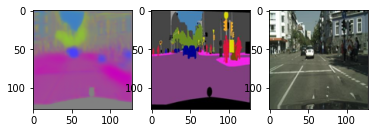

In [88]:
plot_image_grid(
    tf.keras.preprocessing.image.array_to_img(predictions[5]),
    tf.keras.preprocessing.image.array_to_img(y_test[5]),
    tf.keras.preprocessing.image.array_to_img(x_test[5])
)

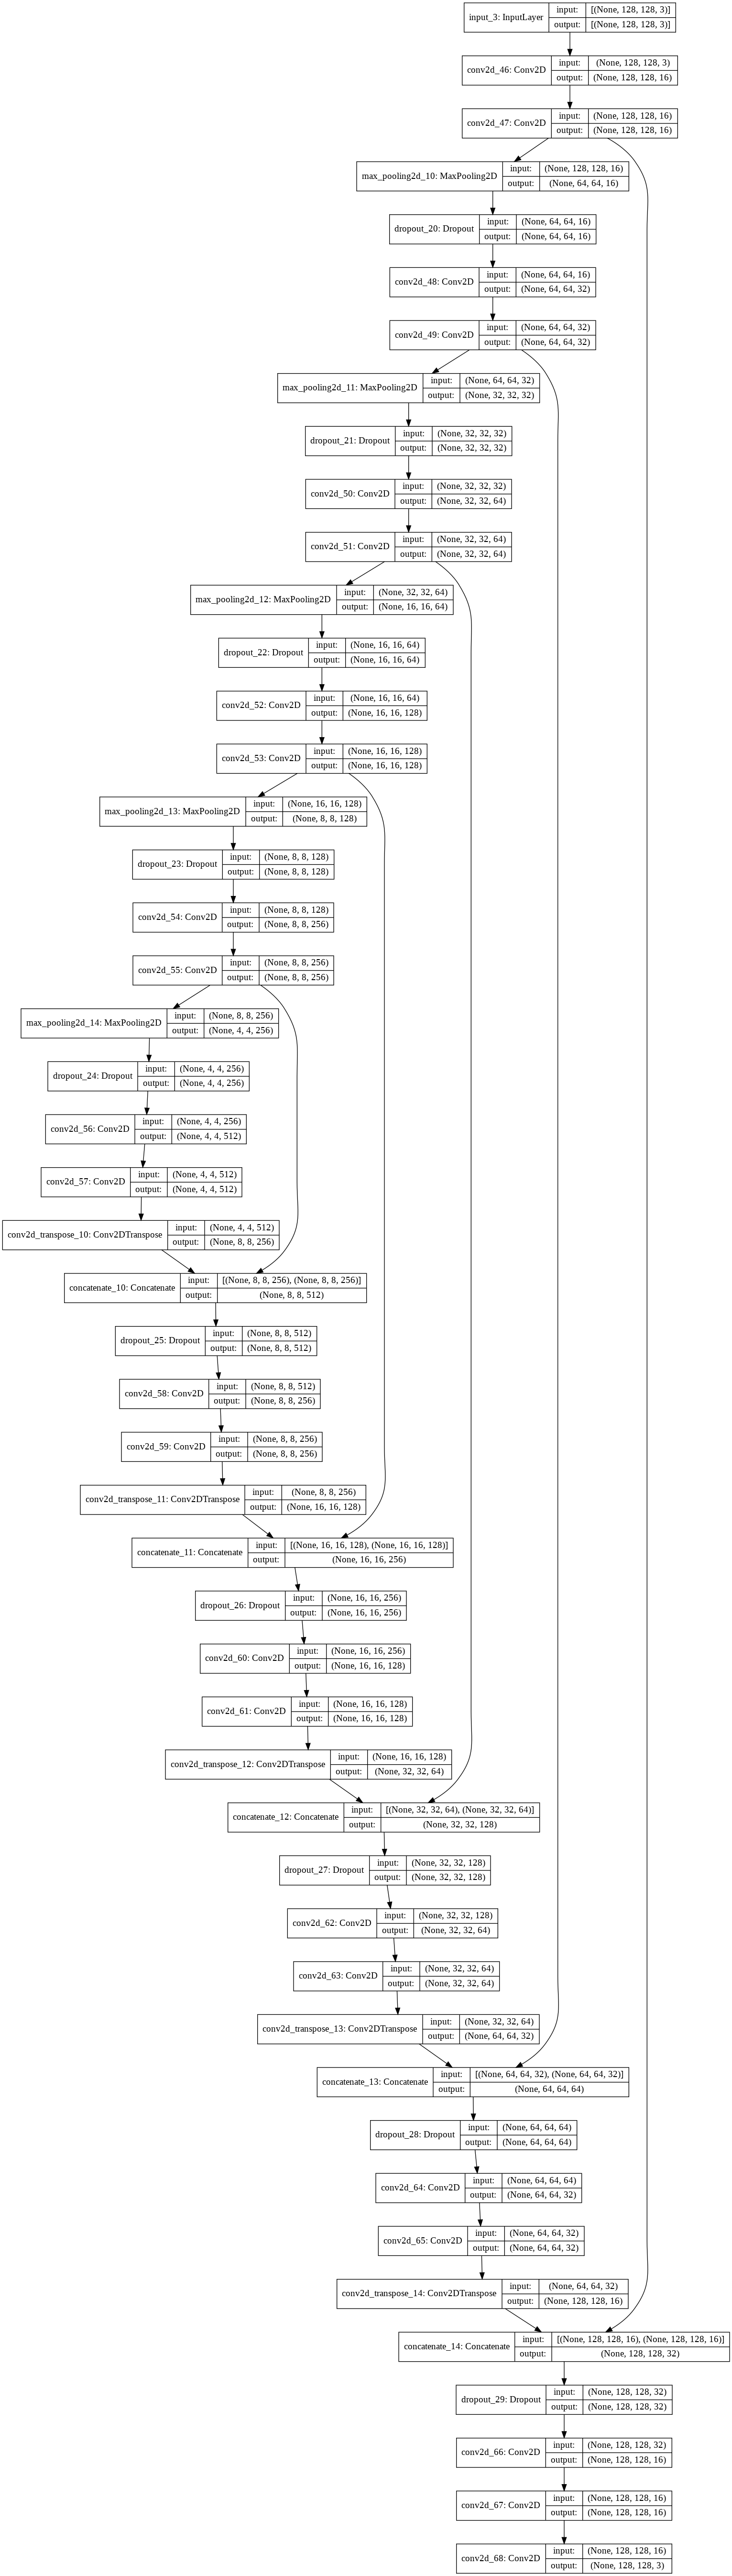

In [83]:
tf.keras.utils.plot_model(segm_model, show_shapes=True)